## Regresión lineal en Python

In [27]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt

### Funciones para el calculo del gradiente descendente

#### Derivadas correspondientes de w y b para la funcion del ECM

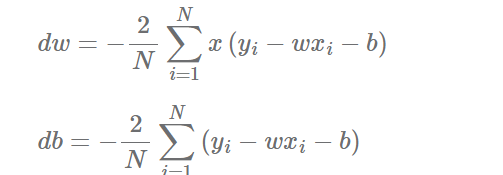

In [2]:
def calcular_modelo(w, b, x):
    """
    Calcula el modelo lineal utilizando los coeficientes w y b, y el valor de entrada x.

    Parámetros:
    w (float): Coeficiente de peso.
    b (float): Término de sesgo.
    x (float): Valor de entrada.

    Retorna:
    float: Valor calculado del modelo lineal.
    """
    return w * x + b

def calcular_error(y, y_pred):
    """
    Calcula el error cuadrático medio entre los valores reales y los valores predichos.

    Parámetros:
    - y: numpy array, valores reales.
    - y_pred: numpy array, valores predichos.

    Retorna:
    - error: float, error cuadrático medio.
    """
    N = y.shape[0]
    error = np.sum((y - y_pred) ** 2) / N
    return error

def gradiente_descendente(w_, b_, alpha, x, y):
    """
    Realiza una actualización de los parámetros w y b utilizando el algoritmo de gradiente descendente.

    Parámetros:
    - w_: Valor actual del parámetro w.
    - b_: Valor actual del parámetro b.
    - alpha: Tasa de aprendizaje del algoritmo.
    - x: Array de numpy con los valores de entrada.
    - y: Array de numpy con los valores de salida.

    Retorna:
    - w: Nuevo valor del parámetro w después de la actualización.
    - b: Nuevo valor del parámetro b después de la actualización.
    """
    N = x.shape[0] # Número de datos

    # Derivadas parciales de la función de error
    dw = -(2/N) * np.sum(x * (y - (w_ * x + b_))) # Derivada parcial con respecto a w
    db = -(2/N) * np.sum(y - (w_ * x + b_)) # Derivada parcial con respecto a b
    w = w_ - alpha * dw # Actualización de w
    b = b_ - alpha * db # Actualización de b

    return w, b

### Importamos el dataset con pandas

    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158


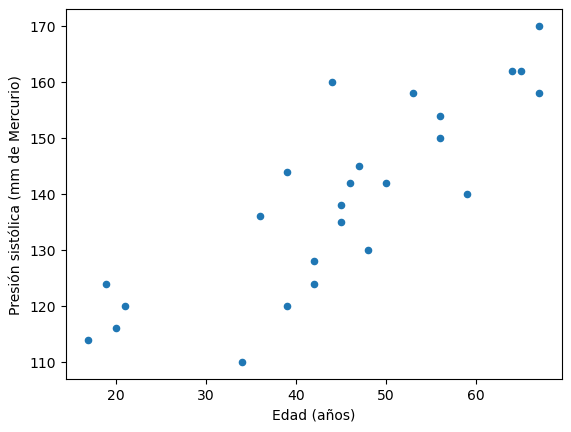

In [33]:
datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])[:25]
print(datos)

# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

### Entrenamiento del modelo

Epoch 1000
    w: 2.8  b: 6.1
    error: [841.90344382]
Epoch 2000
    w: 2.7  b: 12.6
    error: [735.95391807]
Epoch 3000
    w: 2.5  b: 18.6
    error: [644.81313422]
Epoch 4000
    w: 2.4  b: 24.2
    error: [566.41124971]
Epoch 5000
    w: 2.3  b: 29.4
    error: [498.96772735]
Epoch 6000
    w: 2.2  b: 34.2
    error: [440.95089858]
Epoch 7000
    w: 2.1  b: 38.7
    error: [391.04317872]
Epoch 8000
    w: 2.0  b: 42.9
    error: [348.11114409]
Epoch 9000
    w: 2.0  b: 46.7
    error: [311.17979154]
Epoch 10000
    w: 1.9  b: 50.3
    error: [279.41039572]
Epoch 11000
    w: 1.8  b: 53.6
    error: [252.08146133]
Epoch 12000
    w: 1.8  b: 56.6
    error: [228.57233768]
Epoch 13000
    w: 1.7  b: 59.5
    error: [208.34912345]
Epoch 14000
    w: 1.7  b: 62.1
    error: [190.95254159]
Epoch 15000
    w: 1.6  b: 64.6
    error: [175.98750899]
Epoch 16000
    w: 1.6  b: 66.8
    error: [163.11416395]
Epoch 17000
    w: 1.5  b: 68.9
    error: [152.04014782]
Epoch 18000
    w: 1.5  

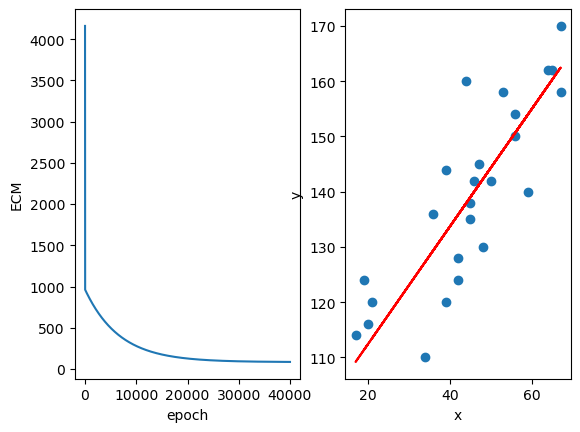

A los 90  años se tendrá una presión sanguínea de 186.9


In [35]:
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

#
# Aprender los coeficientes "w" y "b" usando el gradiente descendente
#

# Inicializar "w" y "b" aleatoriamente, definir alpha y número de iteraciones.
# En este caso se debe definir una tasa de aprendizaje muy pequeña (w=0.0004) para
# garantizar la convergencia del algoritmo

w = np.random.randn(1)[0]
b = np.random.randn(1)[0]
alpha = 0.0004
nits = 40000

start_time = time()  # Tiempo de inicio
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w, b, alpha, x, y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w, b, x)

    # Actualizar el valor del error
    error[i] = calcular_error(y, y_)

    # Imprimir resultados cada 1000 epochs
    if (i+1) % 1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

end_time = time()  # Tiempo de finalización

# Calcular el tiempo transcurrido
training_time = (end_time - start_time) * 1000  # Convertir a milisegundos


print("Tiempo de entrenamiento: {:.2f} milisegundos".format(training_time))
# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_regr = calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Predicción
edad = 90
presion = calcular_modelo(w,b,edad)
print("A los {}".format(edad), " años se tendrá una presión sanguínea de {:.1f}".format(presion))